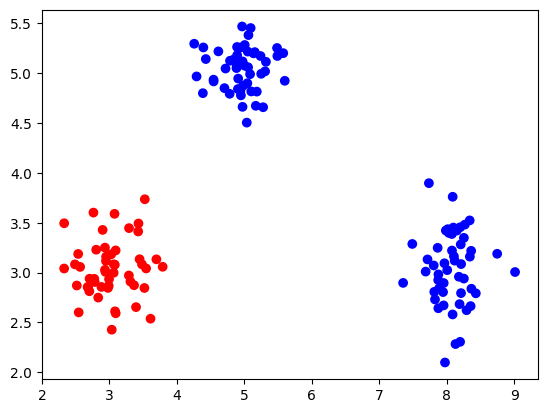

In [1]:
#delete all variables
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import linalg

point_num = 50
N1 = point_num
N2 = point_num
N3 = point_num
K = 2
sigma = 0.1

mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N1 and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
        
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

xx = [[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [9.7 9.7 9.7 ... 9.7 9.7 9.7]
 [9.8 9.8 9.8 ... 9.8 9.8 9.8]
 [9.9 9.9 9.9 ... 9.9 9.9 9.9]]
yy = [[0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 ...
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]]
plane = [[0.03199392 0.03059528 0.02938424 ... 0.50966133 0.50921798 0.50874508]
 [0.03059528 0.02913576 0.0278597  ... 0.51174686 0.51117218 0.51056966]
 [0.02938424 0.0278597  0.02651604 ... 0.51420116 0.51346905 0.51271177]
 ...
 [0.50966133 0.51174686 0.51420116 ... 0.98753959 0.9828473  0.97676614]
 [0.50921798 0.51117218 0.51346905 ... 0.9828473  0.97697757 0.96956638]
 [0.50874508 0.51056966 0.51271177 ... 0.97676614 0.96956638 0.96070369]]


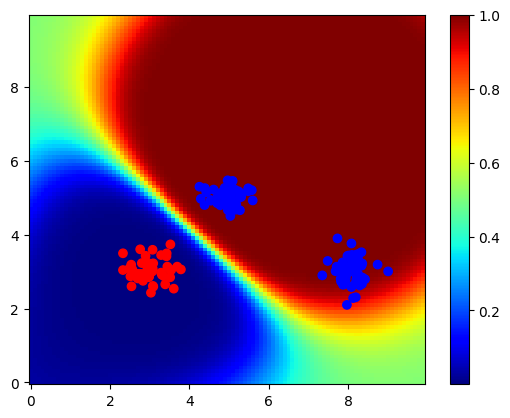

In [46]:
def Gaussian_basis_Func_2D(x, mu, s):
    G = np.exp(-((x[0] - mu) ** 2+(x[1] - mu) ** 2) / (2 * s ** 2))
    return G

def get_sigmoid(a):
    sigmoid = 1 / (1 + np.exp(-a))
    return sigmoid

def bayesian_classify(X, T, M, alpha):
    N = len(X)
    Phi = np.zeros([N, M])
    t = np.zeros([N, 1])
    w = np.zeros([M, 1])
    vy = np.zeros([N, 1])
    R = np.zeros([N, N])
    s0 = alpha * np.identity(M) 
    for n in range(N):
        for m in range(M):
            mu = 10 * m / M
            Phi[n][m] = np.exp(-(np.power((X[n][0] - mu), 2) + np.power((X[n][1]-mu), 2))/2/4)
        t[n][0] = T[n][1]
        
    for n in range(0, 100):
        for i in range(0, N):
            vy[i][0] = get_sigmoid(np.dot(w.T, Phi[i, :]))
            R[i][i] = vy[i][0] * (1 - vy[i][0])
        gE = np.dot(alpha * np.identity(M), w) + np.dot(Phi.T, vy - t)
        H = s0 + np.dot(np.dot(Phi.T, R), Phi)
        S = linalg.inv(H)
        w = w - np.dot(S, gE)
        
    return w, H

def pred_classify(w, x, phi, H):
    for m in range(M):
        mu = 10 * m / M
        phi[m][0] = np.exp(-(np.power((x[0]-mu), 2) + np.power((x[1]-mu), 2))/2/4)
    
    mu_a = np.dot(w.T, phi)
    garma_a2 = np.dot(np.dot(phi.T, H), phi)
    k_a = np.power((1 + math.pi / 8 * garma_a2), 0.5) 
    p = get_sigmoid( mu_a / k_a)
    return p
    
#===============================================

s = 0.5
M = 3
alpha = 0.001
x_size = 10
y_size = 10
num = 10
plane = np.zeros([num * x_size, num * y_size])
xx = np.zeros([num * x_size, num * x_size])
yy = np.zeros([num * y_size, num * y_size])

w_new, H = bayesian_classify(X, T, M, alpha)

for n in range(0, num * x_size):
    for m in range(0, num * y_size):
        x = [n / num, m / num]
        xx[n][m] = n / num
        yy[n][m] = m / num

        phi = np.zeros([M, 1])
        p = pred_classify(w_new, x, phi, H)
        plane[n][m] = p

print('xx =',xx)
print('yy =',yy)
print('plane =',plane)
fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.pcolormesh(xx,yy,plane,cmap='jet')
fig.colorbar(c)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()